# K-Means Clustering

problem statement :

Apply K-Means clustering on below dataset
https://archive.ics.uci.edu/ml/datasets/US+Census+Data+%281990%29


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/clustering/lib_and_dataset/')
from ipynb.fs.full.my_custom_library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
# loading csv data from the file given in the url
data_set = pd.read_csv("/home/admin3/Documents/USCensus1990_data.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
caseid       int64
dAge         int64
dAncstry1    int64
dAncstry2    int64
iAvail       int64
iCitizen     int64
iClass       int64
dDepart      int64
iDisabl1     int64
iDisabl2     int64
iEnglish     int64
iFeb55       int64
iFertil      int64
dHispanic    int64
dHour89      int64
dHours       int64
iImmigr      int64
dIncome1     int64
dIncome2     int64
dIncome3     int64
dIncome4     int64
dIncome5     int64
dIncome6     int64
dIncome7     int64
dIncome8     int64
dIndustry    int64
iKorean      int64
iLang1       int64
iLooking     int64
iMarital     int64
iMay75880    int64
iMeans       int64
iMilitary    int64
iMobility    int64
iMobillim    int64
dOccup       int64
iOthrserv    int64
iPerscare    int64
dPOB         int64
dPoverty     int64
dPwgt1       int64
iRagechld    int64
dRearning    int64
iRelat1      int64
iRelat2      int64
iRemplpar    int64
iRiders      

#### Data-Pre processing

In [2]:
data_set.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [3]:
data_set.isnull().sum()

caseid       0
dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
            ..
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 69, dtype: int64

In [4]:
data_set.isna().sum()

caseid       0
dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
            ..
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 69, dtype: int64

In [5]:
data_set.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,...,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06
mean,1.239142e+06,3.851643e+00,3.299006e+00,1.574252e+00,1.207488e-01,2.880964e-01,1.236083e+00,1.394556e+00,1.432078e+00,1.464860e+00,...,7.939100e-01,1.483541e+00,3.402331e-02,8.310208e-01,1.000718e+00,1.095047e+00,3.844509e-02,8.446546e+00,1.820591e+00,1.391918e-01
std,7.096459e+05,2.048492e+00,4.041179e+00,1.696150e+00,6.709576e-01,9.667118e-01,1.759400e+00,1.760919e+00,8.442641e-01,8.462626e-01,...,1.308956e+00,1.966293e+00,1.812891e-01,8.594720e-01,6.841873e-01,7.437089e-01,1.922683e-01,4.080579e+00,2.108889e+00,4.035386e-01
min,1.000000e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.245710e+05,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
50%,1.239142e+06,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00
75%,1.853713e+06,6.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,...,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.100000e+01,2.000000e+00,0.000000e+00
max,2.468284e+06,7.000000e+00,1.100000e+01,1.200000e+01,4.000000e+00,4.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,...,3.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.700000e+01,7.000000e+00,2.000000e+00


In [6]:
data_set.columns

Index(['caseid', 'dAge', 'dAncstry1', 'dAncstry2', 'iAvail', 'iCitizen',
       'iClass', 'dDepart', 'iDisabl1', 'iDisabl2', 'iEnglish', 'iFeb55',
       'iFertil', 'dHispanic', 'dHour89', 'dHours', 'iImmigr', 'dIncome1',
       'dIncome2', 'dIncome3', 'dIncome4', 'dIncome5', 'dIncome6', 'dIncome7',
       'dIncome8', 'dIndustry', 'iKorean', 'iLang1', 'iLooking', 'iMarital',
       'iMay75880', 'iMeans', 'iMilitary', 'iMobility', 'iMobillim', 'dOccup',
       'iOthrserv', 'iPerscare', 'dPOB', 'dPoverty', 'dPwgt1', 'iRagechld',
       'dRearning', 'iRelat1', 'iRelat2', 'iRemplpar', 'iRiders', 'iRlabor',
       'iRownchld', 'dRpincome', 'iRPOB', 'iRrelchld', 'iRspouse', 'iRvetserv',
       'iSchool', 'iSept80', 'iSex', 'iSubfam1', 'iSubfam2', 'iTmpabsnt',
       'dTravtime', 'iVietnam', 'dWeek89', 'iWork89', 'iWorklwk', 'iWWII',
       'iYearsch', 'iYearwrk', 'dYrsserv'],
      dtype='object')

In [7]:
data_set['caseid'].describe()

count    2.458285e+06
mean     1.239142e+06
std      7.096459e+05
min      1.000000e+04
25%      6.245710e+05
50%      1.239142e+06
75%      1.853713e+06
max      2.468284e+06
Name: caseid, dtype: float64

#### Splitting train and test data set 

In [8]:
# taking only a part to data set around 25 % just to avoid heavy computing
values = data_set[:50000].values

In [9]:
train,test = model_selection.train_test_split(values,test_size=0.25,random_state=0)

#### Training Model 

In [10]:
# finding optimal value of k in wich this dat should be clustered 
k=8
wcss=[]
for i in range(1,k):
    cluster= train_or_predict(train,KMeans(n_clusters=i, random_state=0),1)
    predicted_train = train_or_predict(train,cluster)
    wcss.append(cluster.inertia_)

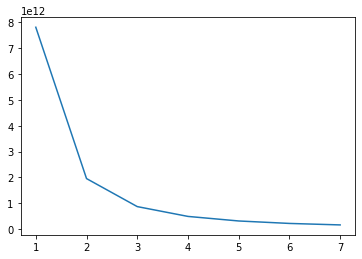

In [11]:
# plotting wcss graph to see the valiation of wcss 
plt.plot(range(1,k),wcss)

In [12]:
# after seeing above wcss curve we came to conclusion that 
# the optimal value of clusters should be 2 or 3 ,, i am taking 3 
cluster= train_or_predict(train,KMeans(n_clusters=3, random_state=0),1)

#### Determining output / dividing into classes.....(3 output classes)

In [13]:
# clustering train set
predicted_train = train_or_predict(train,cluster)

In [14]:
# clustering test set
predicted_test = train_or_predict(test,cluster)

In [15]:
# /looking at clustered output value
predicted_test

array([1, 0, 2, ..., 2, 0, 1], dtype=int32)

In [16]:
# looking at clusterd output value
predicted_train

array([2, 0, 0, ..., 2, 2, 1], dtype=int32)

In [17]:
# checking number of elemets in each cluster of train clusters
cluster_elements(predicted_train)

elements in cluster  0   is  :  12496
elements in cluster  1   is  :  12483
elements in cluster  2   is  :  12521


In [18]:
# checking number of elemets in each cluster of test clusters
cluster_elements(predicted_test)

elements in cluster  0   is  :  4170
elements in cluster  1   is  :  4187
elements in cluster  2   is  :  4143
